<a href="https://colab.research.google.com/github/olger0123/nuevo/blob/main/Energias_renovables_GRUPO13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GRUPO 13 (ENERGIA RENOVABLES)
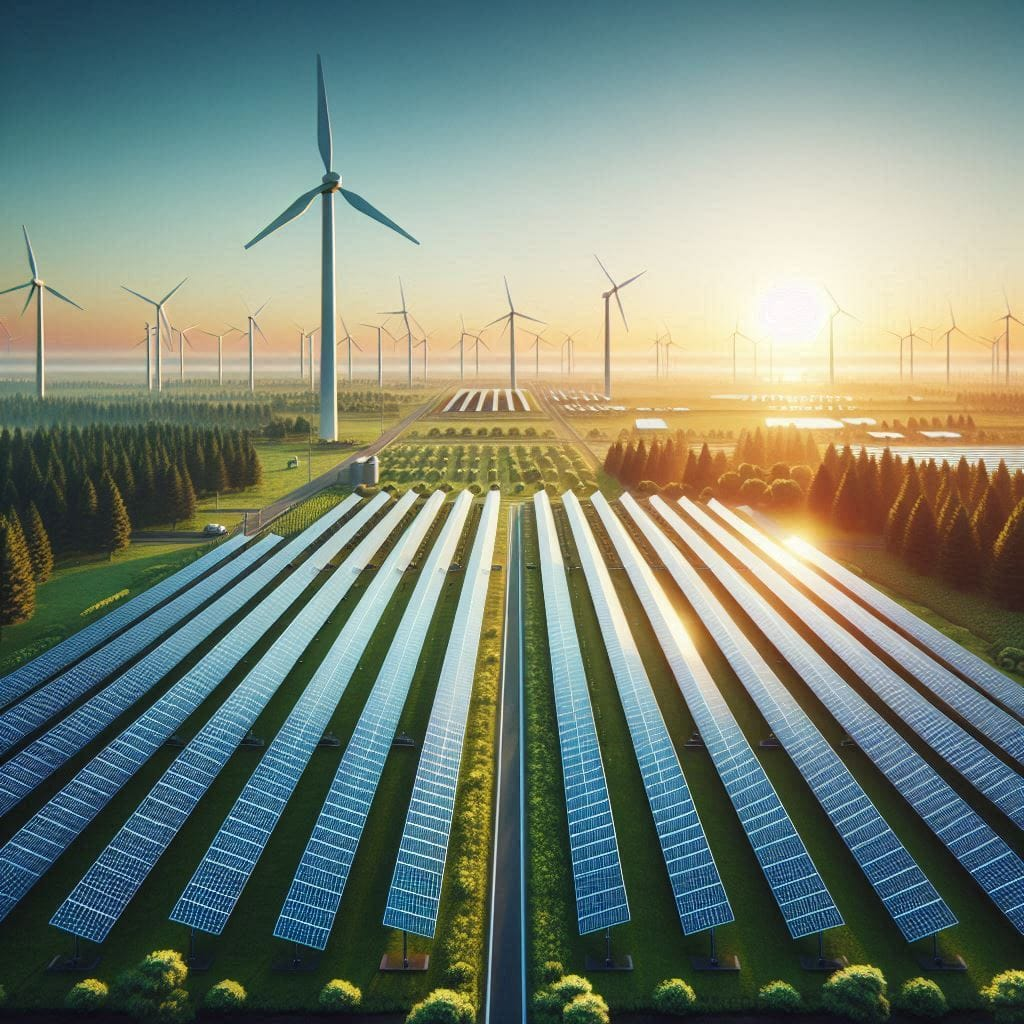
INTEGRANTES:
*   Andrés Argemiro Alvares Oñate
*   Olger Rafael Mercado Alvarez
*   Andrés Correa Cubides



In [ ]:
# librerias necesaria para ejecutar el proyecto
import pandas as pd
import sqlite3
from google.colab import drive
drive.mount('/content/drive')
import csv
import plotly.express as px
import matplotlib.pyplot as plt

Mounted at /content/drive


In [ ]:
#crear base de datos
proyecto_final_db = sqlite3.connect('proyecto_final_db.db')

In [ ]:
#llenar la base de datos con la informacion del csv

llenar = proyecto_final_db.cursor()

llenar.execute(''' CREATE TABLE IF NOT EXISTS energia_renovable_paises(
  Entity TEXT,
  Code TEXT,
  Year INTEGER,
  Electricity_from_wind_TWh ,
  Electricity_from_hydro_TWh REAL,
  Electricity_from_solar_TWh REAL,
  Electricity_from_other_renewables_TWh REAL
)
''')

In [ ]:
# Llenar la base de datos con la información del CSV

with open('/content/drive/MyDrive/Proyecto_Energia_renovable/modern-renewable-prod.csv', 'r', encoding='utf-8') as archivo :
    lector = csv.reader(archivo, delimiter=',')
    next(lector)
    for fila in lector:
        llenar.execute('''
                        INSERT INTO energia_renovable_paises VALUES (?, ?, ?, ?, ?, ?, ?)
                      ''', fila)

proyecto_final_db.commit()

In [ ]:
df = pd.read_sql_query('SELECT * FROM energia_renovable_paises', proyecto_final_db)
df.isnull().sum()

,0
Entity,0
Code,0
Year,0
Electricity_from_wind_TWh,0
Electricity_from_hydro_TWh,0
Electricity_from_solar_TWh,0
Electricity_from_other_renewables_TWh,0


In [ ]:
# Eliminamos los datos de caracteres vacios y world. ya que world no es un pais
proyecto_final_db.execute("DELETE FROM energia_renovable_paises WHERE Code = '' OR Code IS NULL")
proyecto_final_db.execute('DELETE FROM energia_renovable_paises WHERE Entity LIKE \'%World%\'')
proyecto_final_db.commit()

# Ahora mostramos la tabla limpia
df_limpio = pd.read_sql_query('SELECT * FROM energia_renovable_paises', proyecto_final_db)
df_limpio.head(30)

,Entity,Code,Year,Electricity_from_wind_TWh,Electricity_from_hydro_TWh,Electricity_from_solar_TWh,Electricity_from_other_renewables_TWh
0,Afghanistan,AFG,2000,0,0.31,0.00,0.0
1,Afghanistan,AFG,2001,0,0.50,0.00,0.0
2,Afghanistan,AFG,2002,0,0.56,0.00,0.0
3,Afghanistan,AFG,2003,0,0.63,0.00,0.0
4,Afghanistan,AFG,2004,0,0.56,0.00,0.0
5,Afghanistan,AFG,2005,0,0.59,0.00,0.0
6,Afghanistan,AFG,2006,0,0.64,0.00,0.0
7,Afghanistan,AFG,2007,0,0.75,0.00,0.0
8,Afghanistan,AFG,2008,0,0.54,0.00,0.0
9,Afghanistan,AFG,2009,0,0.78,0.00,0.0


In [ ]:
from google.colab import files
df_limpio.to_csv('modern-renewable-prod.csv', index=False, sep=';', encoding='utf-8', columns=['Entity', 'Code','Year','Electricity_from_wind_TWh','Electricity_from_hydro_TWh','Electricity_from_solar_TWh','Electricity_from_other_renewables_TWh'])


# Descargar el archivo
files.download('modern-renewable-prod.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7995 entries, 0 to 7994
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Entity                                 7995 non-null   string        
 1   Code                                   7995 non-null   string        
 2   Year                                   7995 non-null   datetime64[ns]
 3   Electricity_from_wind_TWh              7994 non-null   float64       
 4   Electricity_from_hydro_TWh             7994 non-null   float64       
 5   Electricity_from_solar_TWh             7995 non-null   float64       
 6   Electricity_from_other_renewables_TWh  7989 non-null   float64       
dtypes: datetime64[ns](1), float64(4), string(2)
memory usage: 437.4 KB


In [ ]:
#categorizar la columnas
df['Electricity_from_wind_TWh'] = pd.to_numeric(df['Electricity_from_wind_TWh'], errors='coerce')
df['Electricity_from_hydro_TWh'] = pd.to_numeric(df['Electricity_from_hydro_TWh'], errors='coerce')
df['Electricity_from_other_renewables_TWh'] = pd.to_numeric(df['Electricity_from_other_renewables_TWh'], errors='coerce')
df['Year'] = pd.to_datetime(df['Year'].astype(str) + '-01-01')
df['Entity'] = df['Entity'].astype("string")
df['Code'] = df['Code'].astype("string")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7995 entries, 0 to 7994
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Entity                                 7995 non-null   string        
 1   Code                                   7995 non-null   string        
 2   Year                                   7995 non-null   datetime64[ns]
 3   Electricity_from_wind_TWh              7994 non-null   float64       
 4   Electricity_from_hydro_TWh             7994 non-null   float64       
 5   Electricity_from_solar_TWh             7995 non-null   float64       
 6   Electricity_from_other_renewables_TWh  7989 non-null   float64       
dtypes: datetime64[ns](1), float64(4), string(2)
memory usage: 437.4 KB


In [ ]:
df.describe()

,Year,Electricity_from_wind_TWh,Electricity_from_hydro_TWh,Electricity_from_solar_TWh,Electricity_from_other_renewables_TWh
count,7995,7994.000000,7994.000000,7995.000000,7989.000000
mean,1999-09-30 09:41:35.009380864,11.135878,100.810761,4.011584,9.987586
min,1965-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000
25%,1989-01-01 00:00:00,0.000000,0.080000,0.000000,0.000000
50%,2004-01-01 00:00:00,0.000000,2.820000,0.000000,0.010000
75%,2012-01-01 00:00:00,0.020000,19.059250,0.010000,0.867000
max,2021-01-01 00:00:00,1813.700000,4311.810000,1023.100000,749.990000
std,NaN,79.115512,354.595200,36.179362,46.165962


In [ ]:
#Cantidad de registros por pais

df_pais= pd.read_sql_query('SELECT Entity, COUNT(*) AS CANTIDAD_REGISTROS FROM energia_renovable_paises GROUP BY Entity Order by COUNT(*) DESC', proyecto_final_db)
df_pais

,Entity,CANTIDAD_REGISTROS
0,Vietnam,57
1,United States,57
2,United Kingdom,57
3,Turkey,57
4,Thailand,57
...,...,...
205,American Samoa,21
206,Afghanistan,21
207,USSR,20
208,Montenegro,17


# GRAFICA DE CORRELACION

In [ ]:
df_num = df_limpio.select_dtypes(include=['int64','float64'])
corr_pearson = df_num.corr(method='pearson')
corr_spearman = df_num.corr(method='spearman')

In [ ]:
figCorrPearson= px.imshow(corr_pearson,aspect='auto', title='Matriz de Correlación Pearson')
figCorrSpearman= px.imshow(corr_spearman, aspect='auto',title='Matriz de Correlación Spearman')

figCorrPearson.show()
figCorrSpearman.show()

# GRAFICO MAPA EN EL TIEMPO

In [ ]:
#grafica de produccion de ene
fig = px.choropleth(df_limpio.sort_values('Year'),
                    color='Electricity_from_hydro_TWh',
                    locations='Code',
                    locationmode='ISO-3',
                    animation_frame='Year')
fig.show()

# GRAFICO DE BARRAS

In [ ]:
# TOP 10 DE LOS PAISES QUE MAS PRODUCEN ENERGIA CON HIDRO ELECTRICA

df_hydro = pd.read_sql_query('''select Entity,
SUM(Electricity_from_hydro_TWh ) AS TOTAL FROM energia_renovable_paises
group by Entity order by TOTAL desc LIMIT 10''', proyecto_final_db)
df_hydro

,Entity,TOTAL
0,China,19808.603
1,Canada,16876.840
2,United States,15615.097
3,Brazil,12973.445
4,Russia,6302.941
5,Norway,6036.157
6,Japan,4645.499
7,India,4399.692
8,Sweden,3596.991
9,France,3474.953


In [ ]:
fig = px.bar(df_hydro, x ='Entity',y = 'TOTAL', title='TOP 10 DE LOS PAISES QUE MAS PRODUCEN ENERGIA CON HIDRO ELECTRICA')
xlabel = 'PAISES'
ylabel = 'TOTAL en TWh'
fig.update_layout(xaxis_title=xlabel, yaxis_title=ylabel)
fig.show()

# GRAFICO DE LINEAS

In [ ]:
# Comparacion de los paises que mas producen energia con hidro electricas
df_comparacion = pd.read_sql_query('select Entity,Year,Electricity_from_hydro_TWh FROM energia_renovable_paises WHERE Entity IN ("United States","China")', proyecto_final_db)
df_comparacion

,Entity,Year,Electricity_from_hydro_TWh
0,China,1965,22.097
1,China,1966,22.486
2,China,1967,19.383
3,China,1968,22.870
4,China,1969,23.259
...,...,...,...
109,United States,2017,293.840
110,United States,2018,286.620
111,United States,2019,282.610
112,United States,2020,279.950


In [ ]:
#grafico de china vs usa
fig = px.line(df_comparacion, x='Year', y='Electricity_from_hydro_TWh',color ='Entity', title='Comparación de Produccion de Energia')

# Mostrar el gráfico
fig.show()

# GRAFICO DE BARRAS AGRUPADO

In [ ]:
#creamos un dataframe con los valores de china y estados unidos para ver sus datos en un grafico agrupado
df_agrupado = pd.read_sql_query('''SELECT Entity,
                                   SUM(Electricity_from_wind_TWh) AS Total_Wind,
                                   SUM(Electricity_from_hydro_TWh) AS Total_Hydro,
                                   SUM(Electricity_from_solar_TWh) AS Total_Solar,
                                  SUM(Electricity_from_other_renewables_TWh) AS Total_Other FROM energia_renovable_paises
                                  WHERE Entity IN ("United States", "China") GROUP BY Entity;''', proyecto_final_db)
df_agrupado.head()

,Entity,Total_Wind,Total_Hydro,Total_Solar,Total_Other
0,China,3166.156,19808.603,1256.324,787.671
1,United States,2954.294,15615.097,722.452,2871.817


In [ ]:
# Convertir el DataFrame al formato largo
df_long = df_agrupado.melt(
    id_vars="Entity",
    var_name="Fuente",
    value_name="Electricidad (TWh)"
)
df_long.head(20)

,Entity,Fuente,Electricidad (TWh)
0,China,Total_Wind,3166.156
1,United States,Total_Wind,2954.294
2,China,Total_Hydro,19808.603
3,United States,Total_Hydro,15615.097
4,China,Total_Solar,1256.324
5,United States,Total_Solar,722.452
6,China,Total_Other,787.671
7,United States,Total_Other,2871.817


In [ ]:
#gráfico de barras agrupadas
fig = px.bar(df_long,
             x='Entity',
             y='Electricidad (TWh)',
             color='Fuente',
             barmode='group',
             title='(Energias Renovables) China vs Usa')

fig.show()


# GRAFICO PASTEL

In [ ]:
#creamos un tabla donde solo esten los tipos de produccion de energia renovable
df_pie = pd.read_sql_query('''select Electricity_from_wind_TWh,
                                    Electricity_from_hydro_TWh,
                                    Electricity_from_solar_TWh,
                                    Electricity_from_other_renewables_TWh FROM energia_renovable_paises''', proyecto_final_db)
df_pie.head()

,Electricity_from_wind_TWh,Electricity_from_hydro_TWh,Electricity_from_solar_TWh,Electricity_from_other_renewables_TWh
0,0,0.31,0.0,0.0
1,0,0.50,0.0,0.0
2,0,0.56,0.0,0.0
3,0,0.63,0.0,0.0
4,0,0.56,0.0,0.0


In [ ]:
# Convertir las columnas en numerico y sumar
df_pie = df_pie.apply(pd.to_numeric, errors='coerce')
nuevo_df = df_pie.sum().reset_index()
nuevo_df.columns = ['Columna', 'Total']

print(nuevo_df)

                                 Columna       Total
0              Electricity_from_wind_TWh   12931.101
1             Electricity_from_hydro_TWh  133758.096
2             Electricity_from_solar_TWh    4700.572
3  Electricity_from_other_renewables_TWh   11997.365


In [ ]:
# grafico de pastel
fig_pie = px.pie(nuevo_df, values='Total', names='Columna', title='Distribución de la energía renovable')
fig_pie.show()

# GRAFICOS COLOMBIA

In [ ]:
# rankin de produccion de enegia con hidro electrica en sur america
df_colombia = pd.read_sql_query('''SELECT
                                        Entity,
                                        Year,
                                        Electricity_from_hydro_TWh,
                                        RANK() OVER (PARTITION BY
                                                      Year
                                                    ORDER BY
                                                      Electricity_from_hydro_TWh DESC
                                                    ) paises_rank
                                 FROM
                                    energia_renovable_paises
                                     WHERE
                                  Year = 2020
                                  AND Entity IN ('Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia',
                       'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'); ''',proyecto_final_db)
df_colombia.head(20)

,Entity,Year,Electricity_from_hydro_TWh,paises_rank
0,Brazil,2020,409.50,1
1,Venezuela,2020,72.00,2
2,Paraguay,2020,49.34,3
3,Colombia,2020,45.82,4
4,Peru,2020,29.04,5
5,Ecuador,2020,24.79,6
6,Argentina,2020,24.26,7
7,Chile,2020,20.79,8
8,Uruguay,2020,3.95,9
9,Bolivia,2020,2.94,10


In [ ]:
# Elegir el país al que se le cambiará el color
pais_destacado = 'Colombia'

# Crear una columna para definir colores
df_colombia['Color'] = df_colombia['Entity'].apply(lambda x: 'red' if x == pais_destacado else 'blue')
df_colombia.head(20)

,Entity,Year,Electricity_from_hydro_TWh,paises_rank,Color
0,Brazil,2020,409.50,1,blue
1,Venezuela,2020,72.00,2,blue
2,Paraguay,2020,49.34,3,blue
3,Colombia,2020,45.82,4,red
4,Peru,2020,29.04,5,blue
5,Ecuador,2020,24.79,6,blue
6,Argentina,2020,24.26,7,blue
7,Chile,2020,20.79,8,blue
8,Uruguay,2020,3.95,9,blue
9,Bolivia,2020,2.94,10,blue


# GRAFICO DE BARRAS SUR AMERICA

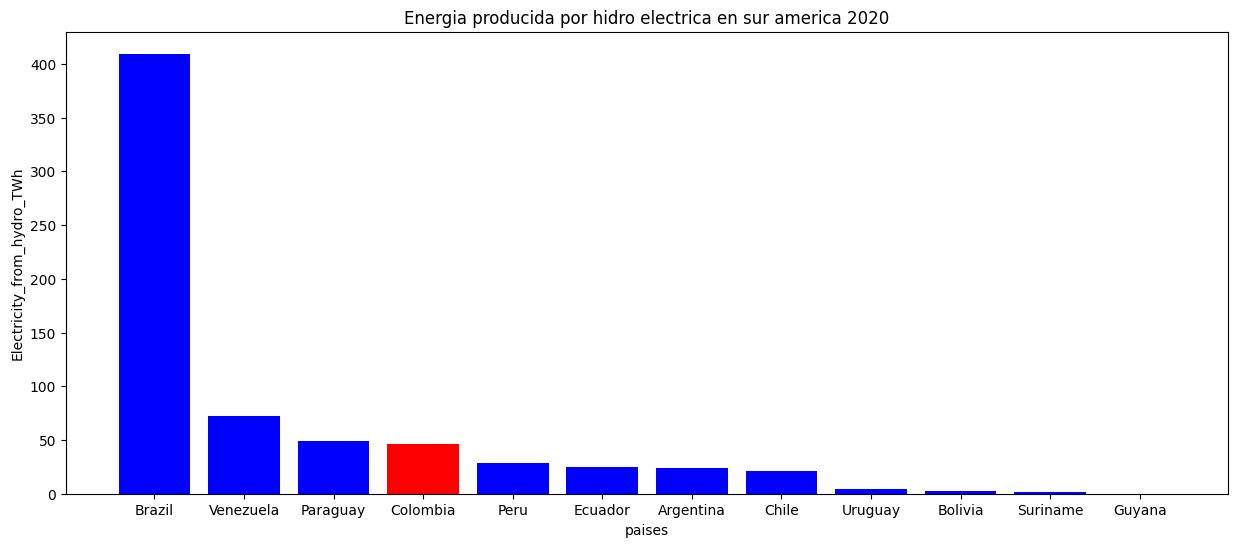

In [ ]:
#graficas de barras de produccion de energia en el año 2020

plt.figure(figsize=(15, 6))

plt.bar(df_colombia['Entity'], df_colombia['Electricity_from_hydro_TWh'], color=df_colombia['Color'])

plt.title('Energia producida por hidro electrica en sur america 2020')
plt.ylabel('Electricity_from_hydro_TWh')
plt.xlabel('paises')
plt.savefig('grafica_barras_suramerica.png', dpi=300, bbox_inches='tight')
plt.show()

# MAPA SUR AMERICA

In [ ]:
# produccion de energia renovable a nivel sur america
df_sur = pd.read_sql_query('''SELECT  * FROM energia_renovable_paises
                                     WHERE
                                 Entity IN ('Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia',
                       'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'); ''',proyecto_final_db)
df_sur.head(5)

,Entity,Code,Year,Electricity_from_wind_TWh,Electricity_from_hydro_TWh,Electricity_from_solar_TWh,Electricity_from_other_renewables_TWh
0,Argentina,ARG,1965,0,1.225,0.0,0.0
1,Argentina,ARG,1966,0,1.241,0.0,0.0
2,Argentina,ARG,1967,0,1.271,0.0,0.0
3,Argentina,ARG,1968,0,1.498,0.0,0.0
4,Argentina,ARG,1969,0,1.344,0.0,0.0


In [ ]:
#grafica mapa de producion de energia en el tiempo
fig = px.choropleth(df_sur.sort_values('Year'),
                    color='Electricity_from_hydro_TWh',
                    locations='Code',
                    locationmode='ISO-3',
                    animation_frame='Year')
fig.show()

In [ ]:
#tabla donde salen
df_comparacion2 = pd.read_sql_query('select Entity,Year,Electricity_from_hydro_TWh FROM energia_renovable_paises WHERE Entity IN ("Brazil","Colombia","Paraguay","Venezuela")', proyecto_final_db)
df_comparacion2

,Entity,Year,Electricity_from_hydro_TWh
0,Brazil,1965,25.515
1,Brazil,1966,27.906
2,Brazil,1967,29.189
3,Brazil,1968,30.550
4,Brazil,1969,32.692
...,...,...,...
185,Venezuela,2016,62.330
186,Venezuela,2017,59.900
187,Venezuela,2018,57.570
188,Venezuela,2019,72.000


In [ ]:
#grafico comparativo sur america
fig = px.line(df_comparacion2, x='Year', y='Electricity_from_hydro_TWh',color ='Entity', title='Comparación de Produccion de Energia')

# Mostrar el gráfico
fig.show()

In [ ]:
df_agrupado2 = pd.read_sql_query('''SELECT Entity,
                                   SUM(Electricity_from_wind_TWh) AS Total_Wind,
                                   SUM(Electricity_from_hydro_TWh) AS Total_Hydro,
                                   SUM(Electricity_from_solar_TWh) AS Total_Solar,
                                  SUM(Electricity_from_other_renewables_TWh) AS Total_Other FROM energia_renovable_paises
                                  WHERE Entity IN ("Brazil","Colombia","Paraguay","Venezuela") GROUP BY Entity;''', proyecto_final_db)
df_agrupado2.head()

,Entity,Total_Wind,Total_Hydro,Total_Solar,Total_Other
0,Brazil,726.486,25946.890,68.72,1523.016
1,Colombia,1.720,3078.856,1.06,39.808
2,Paraguay,0.000,2267.220,0.00,0.000
3,Venezuela,1.540,4686.116,0.12,0.000


In [ ]:
# Convertir el DataFrame al formato largo
df_long2 = df_agrupado2.melt(
    id_vars="Entity",
    var_name="Fuente",
    value_name="Electricidad (TWh)"
)
df_long2.head(100)

,Entity,Fuente,Electricidad (TWh)
0,Brazil,Total_Wind,726.486
1,Colombia,Total_Wind,1.720
2,Paraguay,Total_Wind,0.000
3,Venezuela,Total_Wind,1.540
4,Brazil,Total_Hydro,25946.890
5,Colombia,Total_Hydro,3078.856
6,Paraguay,Total_Hydro,2267.220
7,Venezuela,Total_Hydro,4686.116
8,Brazil,Total_Solar,68.720
9,Colombia,Total_Solar,1.060


In [ ]:
#gráfico de barras agrupadas
fig = px.bar(df_long2,
             x='Entity',
             y='Electricidad (TWh)',
             color='Fuente',
             barmode='group',
             title='(Energias Renovables) sur america')

fig.show()
